In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test)= keras.datasets.mnist.load_data()

In [3]:
len(X_train), len(y_train)

(60000, 60000)

In [4]:
X_train[1].shape

(28, 28)

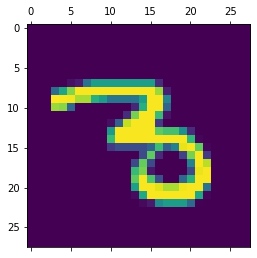

In [5]:
plt.matshow(X_train[30])

In [6]:
y_train[30]

3

In [7]:
X_train=X_train/255
X_test= X_test/255

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train_flattened= X_train.reshape(len(X_train), 28*28)
X_test_flattened= X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [10]:
#model= keras.Sequential( [keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")])

In [11]:
model= keras.Sequential( [keras.layers.Flatten( input_shape=(28,28)),keras.layers.Dense(100, activation="relu"),keras.layers.Dense(10, activation="sigmoid")])

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
#model.fit(X_train_flattened, y_train, epochs=5)

In [14]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2721 - accuracy: 0.9216
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1200 - accuracy: 0.9652
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0833 - accuracy: 0.9755
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0643 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0499 - accuracy: 0.9849


In [25]:
model.get_weights()

[array([[-0.00970424, -0.06713425, -0.04946768, ...,  0.07466643,
         -0.03027268,  0.04970659],
        [-0.01890233, -0.04793268, -0.05976613, ..., -0.02122423,
          0.07545654, -0.07550447],
        [-0.05773006, -0.04487503,  0.0052083 , ..., -0.05309479,
          0.06410527,  0.05653089],
        ...,
        [-0.06690031, -0.05935375, -0.0016863 , ..., -0.04088472,
          0.06372975, -0.01357578],
        [-0.04728722, -0.08168146, -0.05886326, ..., -0.0128497 ,
         -0.07773631, -0.01634745],
        [-0.06671511,  0.06158991, -0.0563248 , ..., -0.04546476,
          0.04290773, -0.08217626]], dtype=float32),
 array([-0.08536391,  0.01268082,  0.153541  ,  0.08148136, -0.09063881,
         0.0974109 ,  0.03754277,  0.0719039 ,  0.04015592,  0.06423619,
        -0.05685149, -0.01160785,  0.06401069, -0.05927403,  0.06608269,
        -0.01966785, -0.0743813 , -0.03207527, -0.01787587,  0.0414834 ,
         0.1467125 ,  0.07306991,  0.07994476, -0.01223475,  0.104

here accuracy is 0.8853 which is decent. sometimes the accuracy is low as the values are not scaled.

After Scaling, accuracy came as 0.9255

In [16]:
y_predicted= model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


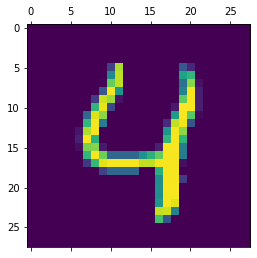

In [17]:
plt.matshow(X_test[4])

In [18]:
y_predicted[4]

array([2.5209894e-02, 9.0179208e-04, 1.2170869e-02, 1.0102362e-04,
       9.9994814e-01, 3.3339178e-03, 4.8678044e-02, 4.4022259e-01,
       4.4798039e-02, 9.8446685e-01], dtype=float32)

In [19]:
np.argmax(y_predicted[4])

4

y_predicted returns an array which contains the activating value/ output values of the nodes of output layer. np.argmax prints the index of the max value of an array.

In [20]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [21]:
y_predicted_labels[:4]

[7, 2, 1, 0]

In [22]:
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [23]:
cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    0,    0,    1,    1,    1,    1,    4,    0],
       [   0, 1112,    4,    1,    0,    0,    6,    1,   11,    0],
       [   5,    0, 1004,    3,    2,    0,    3,    6,    8,    1],
       [   1,    0,    4,  986,    0,    5,    0,    6,    4,    4],
       [   1,    1,    1,    1,  958,    0,    6,    0,    1,   13],
       [   2,    0,    0,    5,    0,  873,    6,    1,    4,    1],
       [   5,    3,    0,    1,    5,    3,  939,    0,    2,    0],
       [   3,    3,   11,    2,    1,    0,    0,  999,    3,    6],
       [   6,    0,    2,    3,    4,    3,    2,    3,  947,    4],
       [   3,    2,    0,    5,    7,    3,    1,    3,    2,  983]])>

Text(33.0, 0.5, 'Truth')

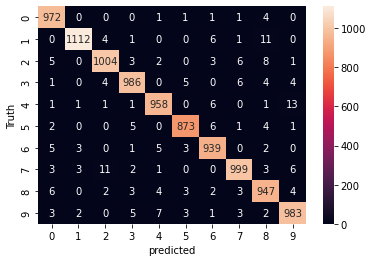

In [24]:
import seaborn as sea
sea.heatmap(cm, annot=True, fmt="d")
plt.xlabel("predicted")
plt.ylabel("Truth")
